# ch03.04. 기초통계 - 대표통계량
---
* 날짜: 2022.05.09
* 이름: 윤태우

## 학습내용
    - 최빈값
    - 중앙값
    - 산술 평균
    - 조화 평균
    - 절사 평균


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import *

## 대표 통계 - 수치자료형
---

### **| 데이터 생성**

```
# 아래 함수는 랜덤한 정수를 반환합니다.
np.random.randint(low, hight, shape)
# low = 최소값
# hight = 최대값
# shape = 추출할 데이터의 크기
```

* 최소값 1, 최대값 100인 데이터 1000개 생성하기

In [13]:
# 넘파이 랜덤 시드 0으로 설정
# 넘파이 배열 `a`로 바인딩
np.random.seed(0)
a = np.random.randint(1, 101, 1000)

# 판다스 시리즈 `s`로 바인딩
s = pd.Series(a)

* 데이터 분포 그리기

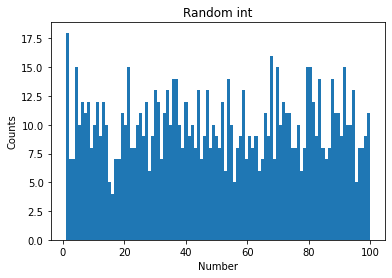

In [69]:
plt.hist(a, width = 1, bins = 100)
plt.xlabel('Number')
plt.ylabel('Counts')
plt.title('Random int')
plt.show()

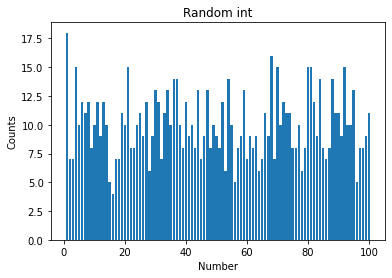

In [50]:
num_a = []
x = np.arange(1,101)
for i in range(1,101) :
  num_a.append(list(a).count(i))
plt.bar(x,num_a)
plt.xlabel('Number')
plt.ylabel('Counts')
plt.title('Random int')
plt.show()

### **| 중앙값**
```
np.median(a)
s.median()
```

* 중앙값 계산

In [52]:
print(f'np : {np.median(a)}, series : {s.median()}')

np : 50.0, series : 50.0


### **| 산술평균**

가장 보편적으로 사용되는 평균

\begin{align}
\mu = \frac{\sum^n_{i=1}x_i}{n}
\end{align}

\begin{align}
 & \\
 & x_i :? \\
 & n : ?\\ 
\end{align}

```
np.mean(a)
s.mean()
```

* 평균 계산

In [54]:
print(f'np : {np.mean(a)}, series : {s.mean()}')

np : 50.397, series : 50.397


### **| 조화 평균**

비율 및 변화율에 등에 대한 평균을 계산할 때 사용

\begin{align}
\mu_{harmonic} = \frac{n}{\sum^n_{i=1}\frac{1}{x_i}}
\end{align}

\begin{align}
 & \\
 & x_i :? \\
 & n : ?\\ 
\end{align}

* 함수 `harmonic` 생성

In [55]:
def harmonic(X) :
    
  return len(X) / sum(( 1/X ))

* 조화 평균 계산

In [57]:
print(harmonic(a), harmonic(s))

17.083487839894165 17.083487839894165


### **| 절사 평균**

데이터에서 $\alpha$ 개를 제거한 후 평균을 내는 방법

\begin{align}
\mu_{cut}=\frac{\sum^{|n(1-\alpha)|}_{i=|n\alpha|} x_i}{ |n(1-\alpha)|-|n\alpha| }
\end{align}

\begin{align}
 & \\
 & x_i :? \\
 & n : ?\\ 
 & \alpha : ?
\end{align}

```
from scipy.stats import trim_mean
trim_mean(x, alpha) 
```


* alpha 비율 0.1일 때 절사 평균 계산

In [58]:
trim_mean(a,0.1)

50.5025

## 대표 통계 - 범주자료형
---

### **| 데이터 생성**

```
# 아래 함수는 리스트 안의 요소를 랜덤하게 반환합니다.
np.random.choice(list, shape)
# list = 카테고리가 들어있는 리스트
# shape = 추출할 데이터의 크기
```

* `A, B, C` 세개의 카테고리에서 데이터 1000개 생성하기

In [78]:
# 넘파이 랜덤 시드 0으로 설정
# 넘파이 배열 `a`로 바인딩
np.random.seed(0)
list_1 = ['A','B','C']
a = np.random.choice(list_1,1000)
# 판다스 시리즈 `s`로 바 인딩
s = pd.Series(a)

* 데이터 분포 그리기

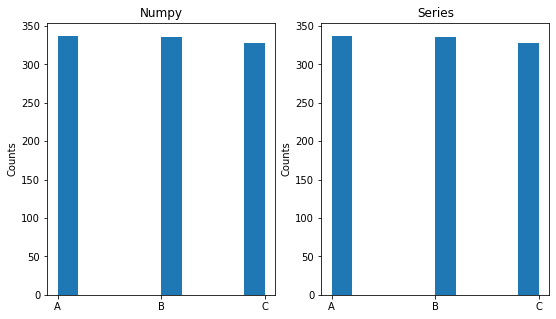

In [84]:
plt.figure(figsize = (9,5))
plt.subplot(1,2,1)
plt.hist(a)
plt.ylabel('Counts')
plt.title('Numpy')
plt.subplot(1,2,2)
plt.hist(s)
plt.ylabel('Counts')
plt.title('Series')
plt.show()

### **| 최빈값**

```
s.value_counts()

from scipy.stats import mode
mode(a)
```

* `value_counts()` 사용하기

In [86]:
s.value_counts()

A    337
B    335
C    328
dtype: int64

In [99]:
s_1 = pd.DataFrame(s)
s_1.value_counts()

A    337
B    335
C    328
dtype: int64

* 사이파이 함수 `mode` 사용하기

In [100]:
mode(a)

ModeResult(mode=array(['A'], dtype='<U1'), count=array([337]))

## 예제
---

#### **예제 01**

1. 평균이 200만원이고 표준편차가 50만원인 정규분포를 따르는 데이터를 아래 넘파이 함수를 이용해 100개 생성하세요.
```
np.random.normal(mu, std, n)
```

2. 위에서 생성한 데이터의 히스토그램을 그리세요

3. 10억원의 소득을 가지는 데이터 한개를 위 데이터에 추가하세요.

4. 데이터의 히스토그램을 그리세요

5. 10억원의 소득을 추가하기 전과 후의 데이터의 산술평균을 비교하세요.

5. 10억원의 소득을 추가하기 전과 후의 데이터의 절사평균(alpha=0.1)을 비교하세요.

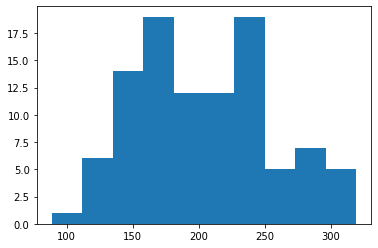

In [215]:
num = np.random.normal(200, 50, 100)
plt.hist(num)
plt.show()

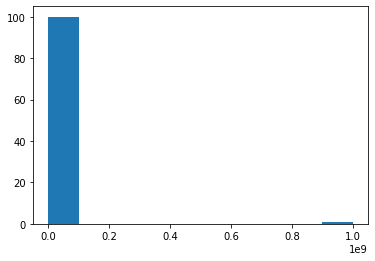

In [216]:
num1 = np.append(num, np.array([1000000000]))
plt.hist(num1)
plt.show()

In [217]:
print(f'mean => before : {np.mean(num)}  after : {np.mean(num1)}')
print(f'trim_mean => before : {trim_mean(num,0.1)}  after : {trim_mean(num1, 0.1)}')

mean => before : 204.10064853739186  after : 9901192.178859938
trim_mean => before : 202.07770294587976  after : 203.10967125620797


#### **예제 02**

타이타닉 데이터셋을 가져오고, 각 변수들의 대표값을 정리하세요.

In [202]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [203]:
df = pd.read_csv('/content/drive/MyDrive/딥러닝 프레임워크 실무/SkillTreePython-DataAnalysis-main/data/타이타닉,샌프란시스코,킥보드 시험/Titanic/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [239]:
df = df.dropna()

In [240]:

for i in df.columns :
  print(f'{i} : {mode(df[i])[0][0]}')

PassengerId : 2
Survived : 1
Pclass : 1
Name : Allen, Miss. Elisabeth Walton
Sex : male
Age : 36.0
SibSp : 0
Parch : 0
Ticket : 113760
Fare : 26.55
Cabin : B96 B98
Embarked : S
